# Socrata API


For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

Each dataset has its own api endpoint. You can find the endpoint for a dataset by clicking on the `API` button in the top right of the dataset screen, then copying the `API Endpoint`. The default output is `JSON`, which you can leave unchanged:

![api_endpoint](assets/api_endpoint.png)

Each API is different, so it is very important to read the documentation for each API to know how to use it properly. The documentation for the SODA API is [here](https://dev.socrata.com/consumers/getting-started.html). It is **HIGHLY RECOMMENDED** that you read the documentation before making any requests, then do deeper dives into specific use cases when questions require. NOTE that the examples in the documentation don't use the `requests` package. You will need to look at the examples and figure out which things go in the `url` and which things go in the `params`.

In [1258]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np
import seaborn as sns

%matplotlib inline

In [1259]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [1260]:
response = requests.get(endpoint)

In [1261]:
response

<Response [200]>

#### 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?
#### ANSWER: August, with 47 searches
NOTE: try with max if there is time

In [1262]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'

In [1263]:
response = requests.get(endpoint)

In [1264]:
result = response.json()
result[0]

{'month_name': 'January',
 'year': '2016',
 'query_count': '19',
 'query_text': 'fire'}

In [1265]:
data = result

fire_df = pd.DataFrame(data)
fire_df = df[df['query_text'] == 'fire'].sort_values(by='query_count', ascending=False)
blankIndex=[''] * len(fire_df)
fire_df.index=blankIndex
fire_df

,month_name,year,query_count,query_text
,August,2016,47,fire
,October,2016,38,fire
,December,2016,38,fire
,September,2016,36,fire
,February,2016,35,fire
,March,2016,32,fire
,November,2016,32,fire
,June,2016,31,fire
,April,2016,26,fire
,May,2016,24,fire


In [1266]:
fire_df = fire_df.drop(['year', 'query_text'], axis=1)
fire_df 

,month_name,query_count
,August,47
,October,38
,December,38
,September,36
,February,35
,March,32
,November,32
,June,31
,April,26
,May,24


#### 2. Make an API request that returns all the times a query was run more than 100 times in a month. 
#### How many times did this occur?
ANSWER: 1262

In [1267]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100&$limit=2000'

response = requests.get(endpoint)

result = response.json()

In [1268]:
response

<Response [200]>

In [1269]:
result = response.json()
len(result)

1262

####  3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  
ANSWER: 56

In [1270]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000&query_text=codes&$where=query_count > 100'

response = requests.get(endpoint)

result = response.json()

In [1271]:
response

<Response [200]>

In [1272]:
result = response.json()
len(result)

56

#### 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [1273]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

params = {

    '$limit': 50000
}

response = requests.get(endpoint, params = params)

result = response.json()
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [1274]:
len(result)

43677

In [1275]:
whole_df = pd.DataFrame(result)
whole_df

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [1276]:
maps_df = whole_df.loc[whole_df['query_text'] == 'maps']
maps_df

,month_name,year,query_count,query_text,month
2,January,2014,97,maps,NaN
503,February,2014,140,maps,NaN
1005,March,2014,144,maps,NaN
1503,April,2014,152,maps,NaN
2003,May,2014,119,maps,NaN
...,...,...,...,...,...
39196,November,2020,86,maps,11
39688,December,2020,113,maps,12
41188,March,2021,132,maps,3
41683,April,2021,148,maps,4


In [1277]:
sns.set_style("darkgrid")

C:\Users\houxu\AppData\Local\Temp\ipykernel_22928\90078885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['query_count'] = maps_df['query_count'].astype(int)
C:\Users\houxu\AppData\Local\Temp\ipykernel_22928\90078885.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['year'] = maps_df['year'].astype(int)


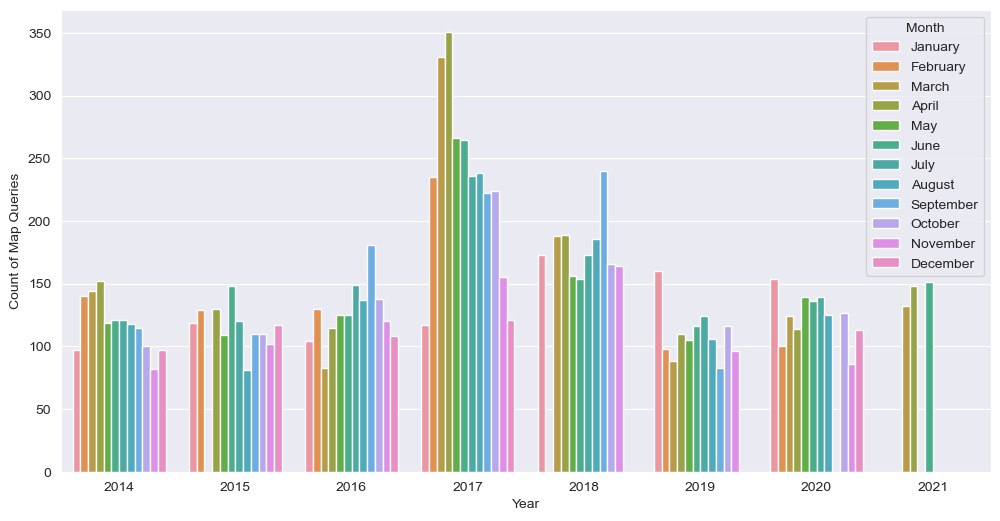

In [1307]:
#BASED FROM ALEC'S CHART
maps_df['query_count'] = maps_df['query_count'].astype(int)
maps_df['year'] = maps_df['year'].astype(int)

plt.figure(figsize=(12, 6))

ax = sns.barplot(data=maps_df, y='query_count', x='year', hue='month_name')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Map Queries')
ax.legend(loc='upper right', title='Month');

In [1292]:
month_dict = {"January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, "July": 7, "August": 8,
              "September": 9, "October": 10, "November": 11, "December": 12}

In [1293]:
# Create a new column 'month_num' with the mapped month number
maps_df['month_num'] = maps_df['month_name'].map(month_dict)
maps_df

C:\Users\houxu\AppData\Local\Temp\ipykernel_22928\655789942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['month_num'] = maps_df['month_name'].map(month_dict)


,month_name,year,query_count,query_text,month,month_num
2,January,2014,97,maps,NaN,1
503,February,2014,140,maps,NaN,2
1005,March,2014,144,maps,NaN,3
1503,April,2014,152,maps,NaN,4
2003,May,2014,119,maps,NaN,5
...,...,...,...,...,...,...
39196,November,2020,86,maps,11,11
39688,December,2020,113,maps,12,12
41188,March,2021,132,maps,3,3
41683,April,2021,148,maps,4,4


In [1304]:
# combine month_num and year into datetime column
maps_df['datetime'] = pd.to_datetime(maps_df['year'].astype(str) + '-' + maps_df['month_num'].astype(str) + '-1')
maps_df

C:\Users\houxu\AppData\Local\Temp\ipykernel_22928\1891652468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['datetime'] = pd.to_datetime(maps_df['year'].astype(str) + '-' + maps_df['month_num'].astype(str) + '-1')


,month_name,year,query_count,query_text,month,month_num,datetime
2,January,2014,97,maps,NaN,1,2014-01-01
503,February,2014,140,maps,NaN,2,2014-02-01
1005,March,2014,144,maps,NaN,3,2014-03-01
1503,April,2014,152,maps,NaN,4,2014-04-01
2003,May,2014,119,maps,NaN,5,2014-05-01
...,...,...,...,...,...,...,...
39196,November,2020,86,maps,11,11,2020-11-01
39688,December,2020,113,maps,12,12,2020-12-01
41188,March,2021,132,maps,3,3,2021-03-01
41683,April,2021,148,maps,4,4,2021-04-01


In [1313]:
maps_df_sorted = maps_df.sort_values('datetime')

In [1316]:
maps_df_sorted['month_year'] = df['datetime'].dt.strftime('%B %Y')
maps_df_sorted

,month_name,year,query_count,query_text,month,month_num,datetime,month_year
2,January,2014,97,maps,NaN,1,2014-01-01,January 2014
503,February,2014,140,maps,NaN,2,2014-02-01,February 2014
1005,March,2014,144,maps,NaN,3,2014-03-01,March 2014
1503,April,2014,152,maps,NaN,4,2014-04-01,April 2014
2003,May,2014,119,maps,NaN,5,2014-05-01,May 2014
...,...,...,...,...,...,...,...,...
39196,November,2020,86,maps,11,11,2020-11-01,November 2020
39688,December,2020,113,maps,12,12,2020-12-01,December 2020
41188,March,2021,132,maps,3,3,2021-03-01,March 2021
41683,April,2021,148,maps,4,4,2021-04-01,April 2021


C:\Users\houxu\AppData\Local\Temp\ipykernel_22928\2198091152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['year'] = maps_df['year'].astype(int)


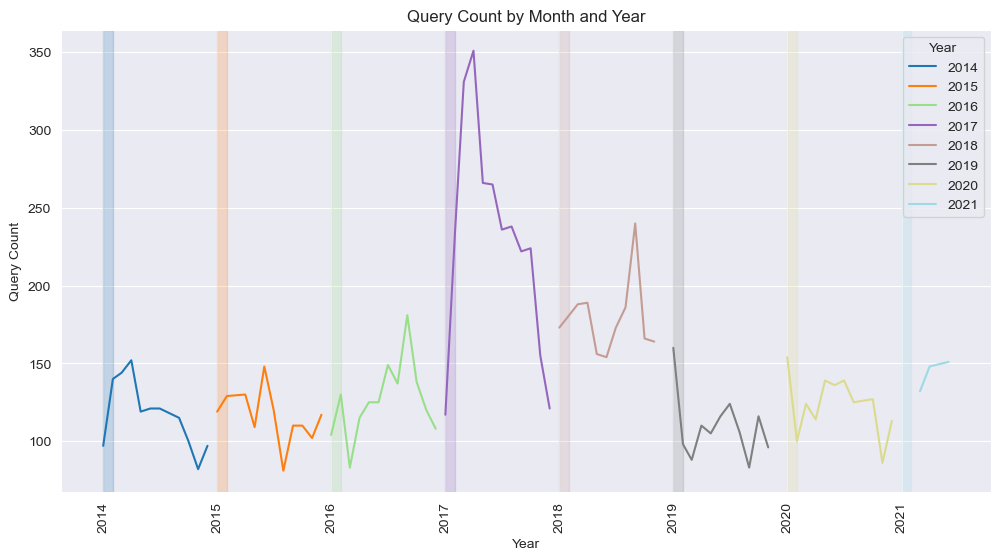

In [1317]:
df=maps_df_sorted

df['query_count'] = df['query_count'].astype(int)
maps_df['year'] = maps_df['year'].astype(int)

fig, ax = plt.subplots(figsize=(12, 6))

# create a color map based on the unique years in the data
cmap = plt.get_cmap('tab20', len(df['year'].unique()))

# group the data by year and iterate over each group
for i, (year, group) in enumerate(df.groupby('year')):

    # plot the data for the year
    ax.plot(group['datetime'], group['query_count'], label=year, color=cmap(i))

    # draw a shaded region at the start of the year
    ax.axvspan(pd.to_datetime(f'{year}-01-01'), pd.to_datetime(f'{year}-02-01'), color=cmap(i), alpha=0.2)

# set the x-axis label and rotate the tick labels
ax.set_xlabel('Year')
plt.xticks(rotation=90)

# set the y-axis label
ax.set_ylabel('Query Count')

# set the title
ax.set_title('Query Count by Month and Year')

# add a legend
ax.legend(title='Year', loc='upper right');

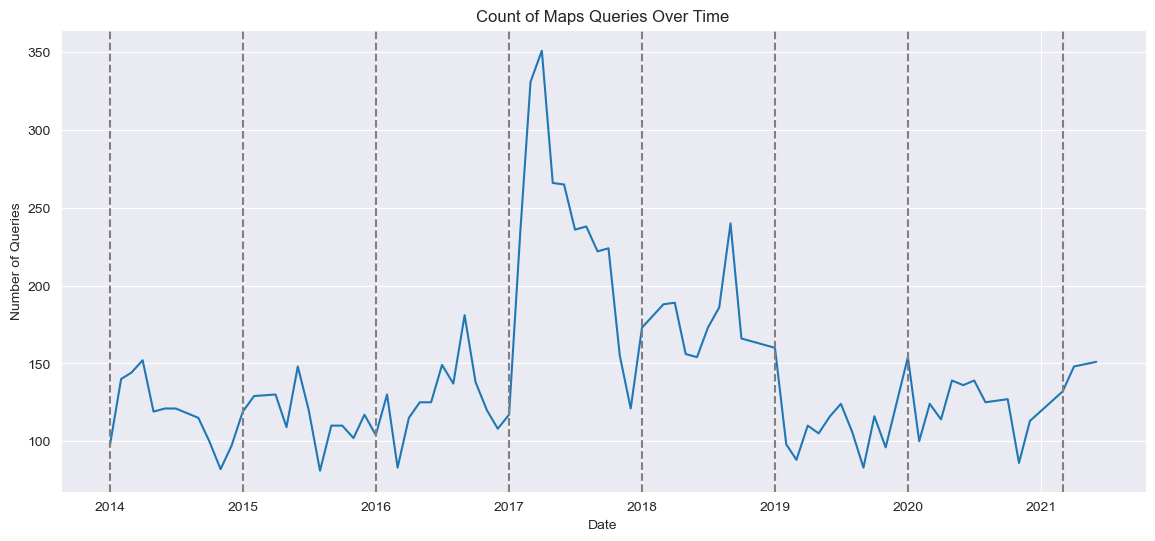

In [1321]:
df=maps_df_sorted

df['query_count'] = df['query_count'].astype(int)
df['year'] = df['year'].astype(int)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(df['datetime'], df['query_count'])
ax.set_xlabel('Date')
ax.set_ylabel('Number of Queries')
ax.set_title('Count of Maps Queries Over Time')

year_starts = df.groupby('year')['datetime'].min()
for date in year_starts:
    ax.axvline(date, linestyle='--', color='gray')

#### Stretch Questions

5. Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)  

6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.  

#### Bonus

7. Socrata is used by many cities, states, and federal organizations. Find additional datasets through [Socrata's Open Data Network](http://www.opendatanetwork.com/) and do an analysis comparing them to Nashville or each other.

#### Show and Tell
At the end of the project you will present some general insights, visualizations, or other finding from any part of the project. This will be informal (showing your Jupyter notebook is fine, no need to make a powerpoint) and should be no more than 5 min. If you had challenges making your visualizations, then it is fine to discuss your experience working with the API and what you were intending to show.

Alec's code for 4
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'
response4 = requests.get(endpoint4)
params4 = {
    'query_text' : 'maps'
}
map_query = requests.get(endpoint4, params = params4)
maps = map_query.json()
maps_df = pd.DataFrame(maps)
maps_df

Parameters are specific to each API and indicate what information you want back. These can be compared to the various ways you slice a table or df to get just the subset you want. Some parameters are required, others are optional. Always look at the documentation to know what parameters you should include and what are possible values for each one. When using parameters for an API call, you can do the following:

Make an empty dictionary for the params variable
Look at the documentation to know what parameters you should include, add these as keys to the dictionary
Add the appropriate values for each parameter as the values for the dictionary
For example, let's get a fact about a random number between 500 and 600

endpoint = 'http://numbersapi.com/random'

params = {

    'min': 500,

    'max': 600
}

response = requests.get(endpoint, params = params)

response.text

https://dev.socrata.com/docs/queries/

#### Dani H's code converting to datetime
month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
maps_df = maps_df.replace({'month' : month_dict})
maps_df['date'] = pd.to_datetime(maps_df[['year', 'month']].assign(DAY=1))
maps_df

https://dev.socrata.com/docs/functions/#,

endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

params = {
    
    'year': '2016',
    'query_text': 'fire'
}

response = requests.get(endpoint, params)

response.json()

Parameters are specific to each API and indicate what information you want back. These can be compared to the various ways you slice a table or df to get just the subset you want. Some parameters are required, others are optional. Always look at the documentation to know what parameters you should include and what are possible values for each one. When using parameters for an API call, you can do the following:

Make an empty dictionary for the params variable
Look at the documentation to know what parameters you should include, add these as keys to the dictionary
Add the appropriate values for each parameter as the values for the dictionary
For example, let's get a fact about a random number between 500 and 600

endpoint = 'http://numbersapi.com/random'
params = {
    'min': 500,
    'max': 600
}

response = requests.get(endpoint, params = params)

response.text